# Hello Capstone Project Course!

## introduction:

### In this project I will analyze the severity of car accidents and try to predict the severity of a car accident using machine learning models. The data is imported from Kaggle. This notebook will be mainly used for the capstone project.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Data-Collisions.csv")

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [82]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
df_feature = df[['SEVERITYCODE',"X","Y","ADDRTYPE","INCDATE","INCDTTM","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND",
               "LIGHTCOND","PEDROWNOTGRNT","SPEEDING","SEGLANEKEY","CROSSWALKKEY","HITPARKEDCAR"]]

In [35]:
df_feature.shape

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [18]:
## count the NAN values in each column
df_feature.isnull().sum()

SEVERITYCODE          0
X                  5334
Y                  5334
ADDRTYPE           1926
INCDATE               0
INCDTTM               0
JUNCTIONTYPE       6329
UNDERINFL          4884
WEATHER            5081
ROADCOND           5012
LIGHTCOND          5170
PEDROWNOTGRNT    190006
SPEEDING         185340
SEGLANEKEY            0
CROSSWALKKEY          0
HITPARKEDCAR          0
dtype: int64

#### Here I meet the first question: how should I deal with the NaN values? As we can see most of the PEDROWNOTGRNT and SPEEDING values are null, I want to drop the two features at first but it come to me that these could be important factors in a collision. So I assume these values as 0. For other features, as the NaN values are relatively small compare to the total size, I will drop these instances.
#### However, I am not sure what I am doing is proper. In real cases I think we need to talk with the people who take these records or maintatin the database.


In [83]:
df_feature["PEDROWNOTGRNT"]=df_feature["PEDROWNOTGRNT"].fillna(0)
df_feature["SPEEDING"]=df_feature["SPEEDING"].fillna(0)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
df_feature_dropna = df_feature.dropna(axis = 0)
df_feature_dropna.shape
## now we get an balanced data!

(180086, 16)

In [85]:
df_feature_dropna["SEVERITYCODE"].value_counts()

1    124264
2     55822
Name: SEVERITYCODE, dtype: int64

There are only two types of severity. We select 15 features.

In [86]:
df_feature_dropna.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0,0,0,N
1,1,-122.347294,47.647172,Block,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,0,0,N
2,1,-122.334540,47.607871,Block,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,0,0,N
3,1,-122.334803,47.604803,Block,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0,0,0,N
4,2,-122.306426,47.545739,Intersection,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,0,0,N


In [87]:
df_feature_dropna["INCDATE"] = pd.to_datetime(df_feature_dropna["INCDATE"])


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
df_feature_dropna["INCDTTM"] = pd.to_datetime(df_feature_dropna["INCDTTM"])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
df_feature_dropna["INCDTTM"] = df_feature_dropna["INCDTTM"].dt.hour
df_feature_dropna["INCDTTM"].head(5)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    14
1    18
2    10
3     9
4     8
Name: INCDTTM, dtype: int64

In [90]:
df_1 = df_feature_dropna
df_1.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2013-03-27,14,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0,0,0,N
1,1,-122.347294,47.647172,Block,2006-12-20,18,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,0,0,N
2,1,-122.334540,47.607871,Block,2004-11-18,10,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,0,0,N
3,1,-122.334803,47.604803,Block,2013-03-29,9,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0,0,0,N
4,2,-122.306426,47.545739,Intersection,2004-01-28,8,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,0,0,N


In [46]:
# install seaborn package
!conda install -c anaconda seaborn -y

Solving environment: - 
  - https://repo.continuum.io/pkgs/main/osx-64/_ipyw_jlab_nb_ext_conf-0.1.0-py36h2fc01ae_0.tar.bz2/osx-64::_ipyw_jlab_nb_ext_conf-0.1.0-py36h2fc01ae_0, https://repo.continuum.io/pkgs/main/osx-64/conda-build-3.0.22-py36hcb85c65_0.tar.bz2/osx-64::conda-build-3.0.22-py36hcb85c65_0, https://repo.continuum.io/pkgs/main/osx-64/conda-verify-2.0.0-py36he837df3_0.tar.bz2/osx-64::conda-verify-2.0.0-py36he837df3_0, https://repo.continuum.io/pkgs/main/osx-64/osx-64::anaconda-custom-py36_1
  - defaults/osx-64::anaconda-custom-py36_1, https://repo.continuum.io/pkgs/main/osx-64/_ipyw_jlab_nb_ext_conf-0.1.0-py36h2fc01ae_0.tar.bz2/osx-64::_ipyw_jlab_nb_ext_conf-0.1.0-py36h2fc01ae_0, https://repo.continuum.io/pkgs/main/osx-64/conda-build-3.0.22-py36hcb85c65_0.tar.bz2/osx-64::conda-build-3.0.22-py36hcb85c65_0, https://repo.continuum.io/pkgs/main/osx-64/conda-verify-2.0.0-py36he837df3_0.tar.bz2/osx-64::conda-verify-2.0.0-py36he837df3_0
  - defaults/osx-64::_ipyw_jlab_nb_ext_conf-0.

In [50]:
df_1["ADDRTYPE"].value_counts()

Block           117089
Intersection     62997
Name: ADDRTYPE, dtype: int64

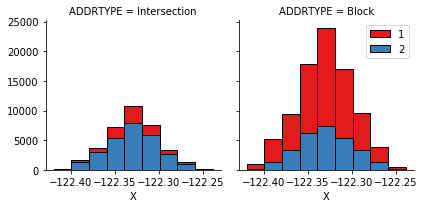

In [54]:
import seaborn as sns

bins = np.linspace(df_1.X.min(), df_1.X.max(), 10)
g = sns.FacetGrid(df_1, col="ADDRTYPE",hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, "X", bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

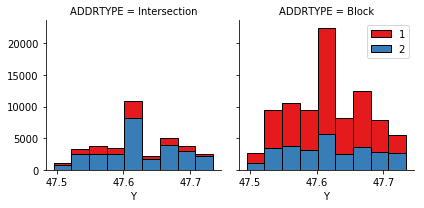

In [55]:
bins = np.linspace(df_1.Y.min(), df_1.Y.max(), 10)
g = sns.FacetGrid(df_1, col="ADDRTYPE",hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, "Y", bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


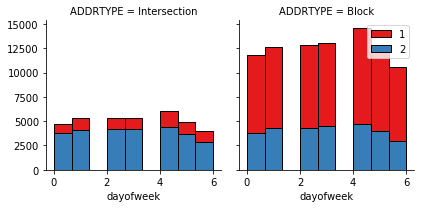

In [92]:
df_1["dayofweek"]=df_1["INCDATE"].dt.dayofweek

bins = np.linspace(df_1.dayofweek.min(), df_1.dayofweek.max(), 10)
g = sns.FacetGrid(df_1, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [93]:
df_1["weekend"] = df_1["dayofweek"].apply(lambda x: 1 if(x>3) else 0)
df_1.head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,SEVERITYCODE,X,Y,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend
0,2,-122.323148,47.703140,Intersection,2013-03-27,14,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0,0,0,N,2,0
1,1,-122.347294,47.647172,Block,2006-12-20,18,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,0,0,N,2,0
2,1,-122.334540,47.607871,Block,2004-11-18,10,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,0,0,N,3,0
3,1,-122.334803,47.604803,Block,2013-03-29,9,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0,0,0,N,4,1
4,2,-122.306426,47.545739,Intersection,2004-01-28,8,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,0,0,N,2,0


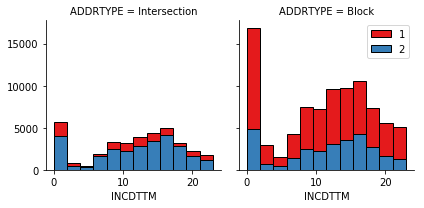

In [62]:
bins = np.linspace(df_1.INCDTTM.min(), df_1.INCDTTM.max(), 13)
g = sns.FacetGrid(df_1, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, "INCDTTM", bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [94]:
df_1["earlymorning"] = df_1["INCDTTM"].apply(lambda x: 1 if(x<4) else 0)
df_1.head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,SEVERITYCODE,X,Y,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend,earlymorning
0,2,-122.323148,47.703140,Intersection,2013-03-27,14,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0,0,0,N,2,0,0
1,1,-122.347294,47.647172,Block,2006-12-20,18,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,0,0,N,2,0,0
2,1,-122.334540,47.607871,Block,2004-11-18,10,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,0,0,N,3,0,0
3,1,-122.334803,47.604803,Block,2013-03-29,9,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0,0,0,N,4,1,0
4,2,-122.306426,47.545739,Intersection,2004-01-28,8,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,0,0,N,2,0,0


In [64]:
df_1.groupby(["JUNCTIONTYPE"])["SEVERITYCODE"].value_counts(normalize=True)

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1               0.699507
                                                   2               0.300493
At Intersection (intersection related)             1               0.562859
                                                   2               0.437141
Driveway Junction                                  1               0.694823
                                                   2               0.305177
Mid-Block (but intersection related)               1               0.678058
                                                   2               0.321942
Mid-Block (not related to intersection)            1               0.784020
                                                   2               0.215980
Ramp Junction                                      1               0.676259
                                                   2               0.323741
Unknown                 

In [65]:
df_1.groupby(["WEATHER"])["SEVERITYCODE"].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.734694
                          2               0.265306
Clear                     1               0.673457
                          2               0.326543
Fog/Smog/Smoke            1               0.664845
                          2               0.335155
Other                     1               0.848901
                          2               0.151099
Overcast                  1               0.680291
                          2               0.319709
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.659112
                          2               0.340888
Severe Crosswind          1               0.708333
                          2               0.291667
Sleet/Hail/Freezing Rain  1               0.758929
                          2               0.241071
Snowing                   1               0

In [66]:
df_1.groupby(["ROADCOND"])["SEVERITYCODE"].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.674381
                2               0.325619
Ice             1               0.771945
                2               0.228055
Oil             1               0.591837
                2               0.408163
Other           1               0.660870
                2               0.339130
Sand/Mud/Dirt   1               0.645161
                2               0.354839
Snow/Slush      1               0.830072
                2               0.169928
Standing Water  1               0.737374
                2               0.262626
Unknown         1               0.939224
                2               0.060776
Wet             1               0.664262
                2               0.335738
Name: SEVERITYCODE, dtype: float64

In [67]:
df_1.groupby(["LIGHTCOND"])["SEVERITYCODE"].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.775899
                          2               0.224101
Dark - Street Lights Off  1               0.730973
                          2               0.269027
Dark - Street Lights On   1               0.697640
                          2               0.302360
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.662343
                          2               0.337657
Daylight                  1               0.663545
                          2               0.336455
Dusk                      1               0.666316
                          2               0.333684
Other                     1               0.784884
                          2               0.215116
Unknown                   1               0.944778
                          2               0.055222
Name: SEVERITYCODE, dtype: float64

In [173]:
df_1.groupby(["SPEEDING"])["SEVERITYCODE"].value_counts(normalize=True)

SPEEDING  SEVERITYCODE
0         1               0.693680
          2               0.306320
Y         1               0.617616
          2               0.382384
Name: SEVERITYCODE, dtype: float64

In [174]:
df_1.groupby(["PEDROWNOTGRNT"])["SEVERITYCODE"].value_counts(normalize=True)

PEDROWNOTGRNT  SEVERITYCODE
0              1               0.705657
               2               0.294343
Y              2               0.901813
               1               0.098187
Name: SEVERITYCODE, dtype: float64

In [175]:
df_1.groupby(["HITPARKEDCAR"])["SEVERITYCODE"].value_counts(normalize=True)

HITPARKEDCAR  SEVERITYCODE
N             1               0.682245
              2               0.317755
Y             1               0.928886
              2               0.071114
Name: SEVERITYCODE, dtype: float64

In [97]:
df_2 = df_1.replace("Y",1)
df_2 = df_2.replace("N",0)
df_2.groupby(["UNDERINFL"])["SEVERITYCODE"].value_counts(normalize=False)

UNDERINFL  SEVERITYCODE
0          1               63596
           2               30158
1          1                3060
           2                1880
0          1               55314
           2               22200
1          1                2294
           2                1584
Name: SEVERITYCODE, dtype: int64

In [107]:
# df_2.groupby(["UNDERINFL"])["SEVERITYCODE"].value_counts(normalize=True)
df_2["UNDERINFL"]=pd.to_numeric(df_2["UNDERINFL"])
df_2.dtypes

SEVERITYCODE              int64
X                       float64
Y                       float64
ADDRTYPE                 object
INCDATE          datetime64[ns]
INCDTTM                   int64
JUNCTIONTYPE             object
UNDERINFL                 int64
WEATHER                  object
ROADCOND                 object
LIGHTCOND                object
PEDROWNOTGRNT             int64
SPEEDING                  int64
SEGLANEKEY                int64
CROSSWALKKEY              int64
HITPARKEDCAR              int64
dayofweek                 int64
weekend                   int64
earlymorning              int64
dtype: object

In [115]:
df_2.groupby(["HITPARKEDCAR"])["SEVERITYCODE"].value_counts(normalize=True)

HITPARKEDCAR  SEVERITYCODE
0             1               0.682245
              2               0.317755
1             1               0.928886
              2               0.071114
Name: SEVERITYCODE, dtype: float64

In [109]:
df_2.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend,earlymorning
0,2,-122.323148,47.703140,Intersection,2013-03-27,14,At Intersection (intersection related),0,Overcast,Wet,Daylight,0,0,0,0,0,2,0,0
1,1,-122.347294,47.647172,Block,2006-12-20,18,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0,2,0,0
2,1,-122.334540,47.607871,Block,2004-11-18,10,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,0,0,0,3,0,0
3,1,-122.334803,47.604803,Block,2013-03-29,9,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,0,0,0,0,0,4,1,0
4,2,-122.306426,47.545739,Intersection,2004-01-28,8,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,0,0,0,2,0,0


In [161]:
Feature = df_2[["X","Y","ADDRTYPE","weekend","earlymorning","UNDERINFL",
               "PEDROWNOTGRNT","SPEEDING","HITPARKEDCAR"]]
Feature['ADDRTYPE'].replace(to_replace=['Intersection','Block'], value=[0,1],inplace=True)
Feature.head()

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,X,Y,ADDRTYPE,weekend,earlymorning,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,-122.323148,47.703140,0,0,0,0,0,0,0
1,-122.347294,47.647172,1,0,0,0,0,0,0
2,-122.334540,47.607871,1,0,0,0,0,0,0
3,-122.334803,47.604803,1,1,0,0,0,0,0
4,-122.306426,47.545739,0,0,0,0,0,0,0


In [162]:
Feature = pd.concat([Feature, pd.get_dummies(df_2['JUNCTIONTYPE'])],axis=1)
Feature = pd.concat([Feature, pd.get_dummies(df_2['WEATHER'])],axis=1)
Feature = pd.concat([Feature, pd.get_dummies(df_2['LIGHTCOND'])],axis=1)

In [163]:
Feature.drop(['Unknown'],axis=1, inplace=True)
Feature.head()

,X,Y,ADDRTYPE,weekend,earlymorning,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,At Intersection (but not related to intersection),...,Sleet/Hail/Freezing Rain,Snowing,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
0,-122.323148,47.703140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-122.347294,47.647172,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-122.334540,47.607871,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-122.334803,47.604803,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-122.306426,47.545739,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Now let's define dataset and start modeling

In [164]:
X = Feature
y = df_2["SEVERITYCODE"].values

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (144068, 33) (144068,)
Test set: (36018, 33) (36018,)


In [158]:
from sklearn.neighbors import KNeighborsClassifier

In [168]:
k = 5
knn5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = knn5.predict(X_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn5.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.765416331177
Test set Accuracy:  0.669026597812


In [169]:
k = 10
knn10 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = knn10.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn10.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.734972374157
Test set Accuracy:  0.693764228997


In [170]:
k = 15
knn15 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = knn15.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn15.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.727545325818
Test set Accuracy:  0.691432061747


In [171]:
k = 20
knn20 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = knn20.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn20.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.722346391982
Test set Accuracy:  0.700205452829


In [172]:
k = 25
knn25 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = knn25.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn25.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.719417219646
Test set Accuracy:  0.698845021933


In [ ]:
from sklearn.metrics import jaccard_similarity_score
yhat_knn = knn.predict(X_Feature)
js_KNN = jaccard_similarity_score(ytest, yhat_knn)
print("The jaccard similarity of KNN classifier is", js_KNN)